In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [2]:
DATASET_NAME = Targets.Modular
generalisation_mode = GeneralisationModes.weak
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [4]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [5]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 1., 2., 3.], dtype=float32), array([  660,   289,     1, 10913]))
[0.9963763 0.0024064]


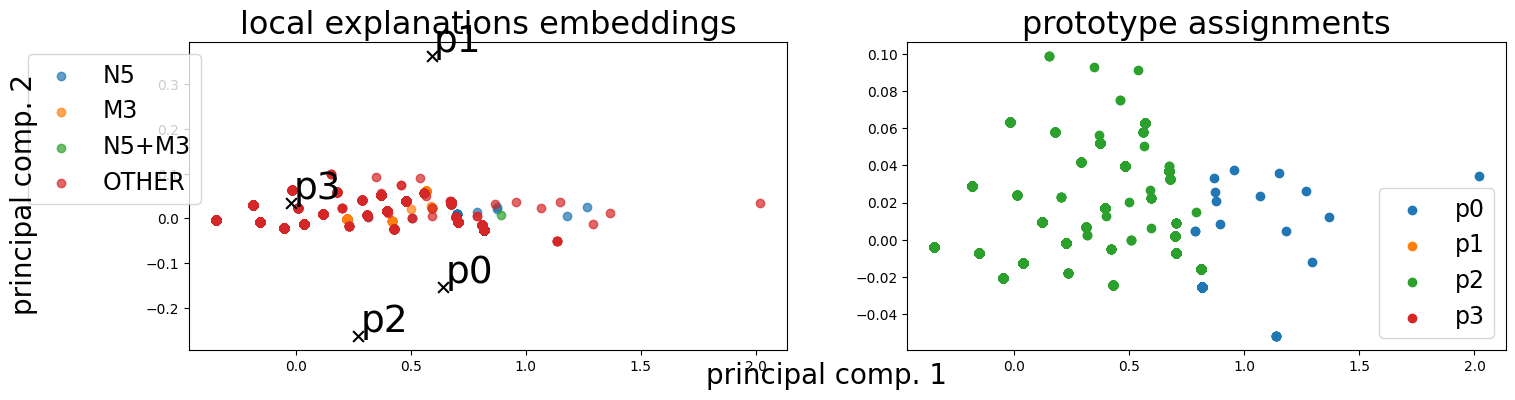

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 0.771293 +- 0.200119
Concept distribution:  (array([0, 2]), array([ 1124, 10739]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.13329, LEN: 0.087459, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.11378, V. LEN 0.084
  2: Loss: 0.09551, LEN: 0.082673, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.10007, V. LEN 0.080
  3: Loss: 0.08579, LEN: 0.079004, Acc: 0.17, V. Acc: 0.46, V. Loss: 0.09040, V. LEN 0.077
  4: Loss: 0.08109, LEN: 0.076492, Acc: 0.49, V. Acc: 0.50, V. Loss: 0.08471, V. LEN 0.074
  5: Loss: 0.07788, LEN: 0.074723, Acc: 0.66, V. Acc: 0.69, V. Loss: 0.08254, V. LEN 0.072
  6: Loss: 0.07632, LEN: 0.073618, Acc: 0.68, V. Acc: 0.69, V. Loss: 0.07979, V. LEN 0.072
  7: Loss: 0.07514, LEN: 0.072806, Acc: 0.68, V. Acc: 0.69, V. Loss: 0.07976, V. LEN 0.072
  8: Loss: 0.07384, LEN: 0.071873, Acc: 0.68, V. Acc: 0

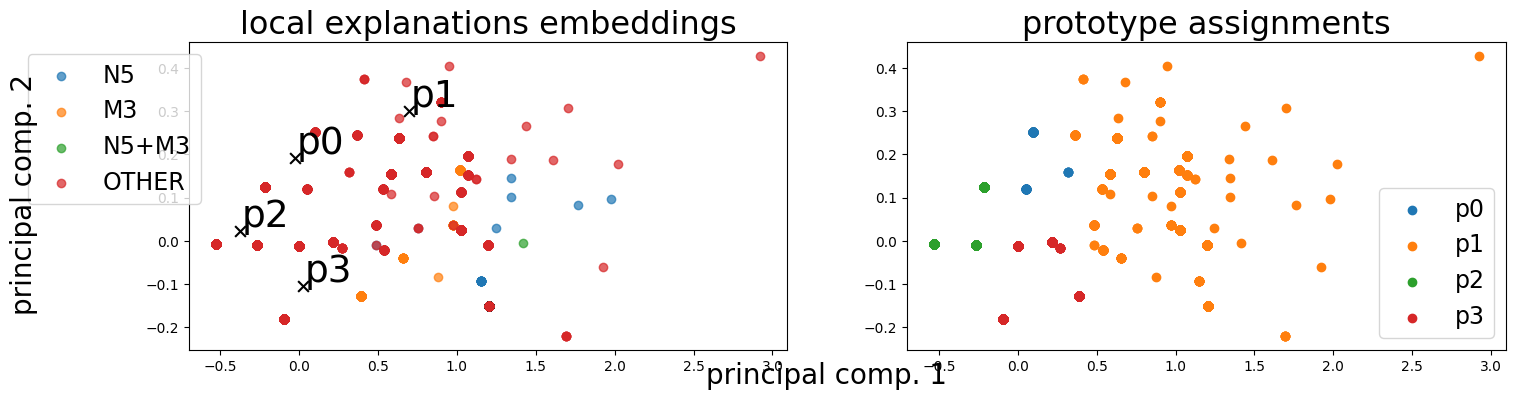

Alpha norms:
tensor([[1.0000, 0.2294, 0.5527, 0.9301],
        [0.8868, 0.9080, 0.6722, 1.0000]])
Concept Purity: 0.911990 +- 0.104933
Concept distribution:  (array([0, 1, 2, 3]), array([ 124, 3111, 7042, 1586]))
Logic formulas:
For class 0:
0.6919642857142857 (feature0000000002) | (feature0000000003) | (feature0000000000) | (feature0000000002 & feature0000000000) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000003) | (feature0000000003 & feature0000000000)
For class 1:
0.6924198250728864 (feature0000000001)
Accuracy as classifier:  0.692
LEN fidelity:  tensor(0.6911)

 20: Loss: 0.07125, LEN: 0.070839, Acc: 0.68, V. Acc: 0.70, V. Loss: 0.07062, V. LEN 0.069
 21: Loss: 0.07102, LEN: 0.070569, Acc: 0.68, V. Acc: 0.70, V. Loss: 0.06823, V. LEN 0.067
 22: Loss: 0.07070, LEN: 0.070332, Acc: 0.68, V. Acc: 0.70, V. Loss: 0.06769, V. LEN 0.066
 23: Loss: 0.06996, LEN: 0.069607, Acc: 0.69, V. Acc: 0.70, V. Loss: 0.06705, V. LEN 0.066
 24: Loss: 0.06879, LEN: 0.

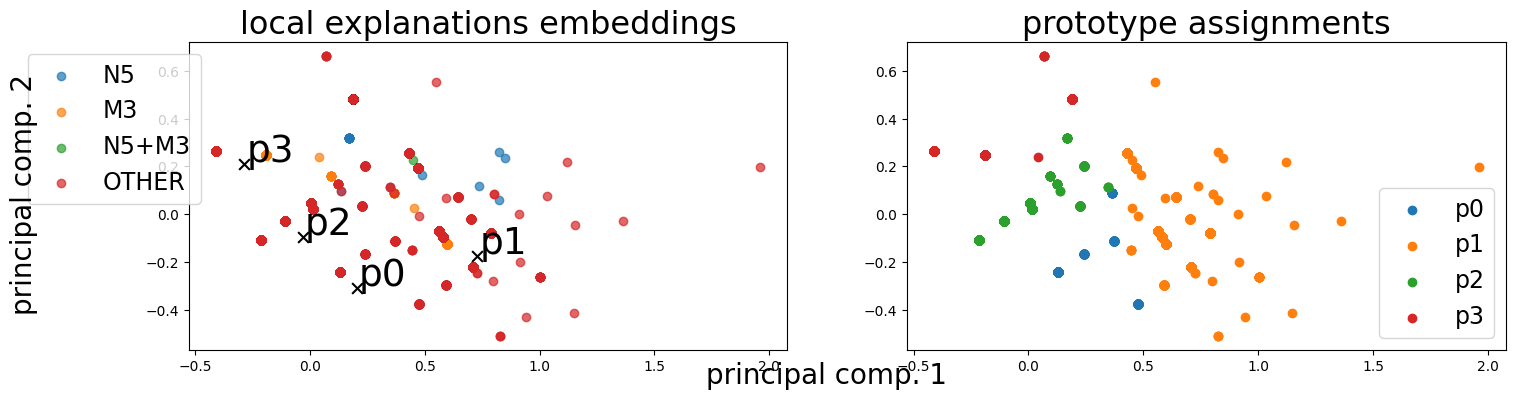

Alpha norms:
tensor([[1.0000, 0.2188, 0.7221, 0.8513],
        [0.9181, 0.7878, 0.5244, 1.0000]])
Concept Purity: 0.888606 +- 0.148376
Concept distribution:  (array([0, 1, 2, 3]), array([1139, 1787, 6772, 2165]))
Logic formulas:
For class 0:
0.7488155976676385 (feature0000000003) | (feature0000000002) | (feature0000000000) | (feature0000000002 & feature0000000000) | (feature0000000003 & feature0000000000) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7489978134110787 (feature0000000001)
Accuracy as classifier:  0.7488
LEN fidelity:  tensor(0.7488)

 40: Loss: 0.06208, LEN: 0.061963, Acc: 0.73, V. Acc: 0.75, V. Loss: 0.06027, V. LEN 0.059
 41: Loss: 0.06160, LEN: 0.061451, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05921, V. LEN 0.059
 42: Loss: 0.06186, LEN: 0.061741, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05976, V. LEN 0.059
 43: Loss: 0.06182, LEN: 0.061693, Acc: 0.73, V. Acc: 0.75, V. Loss: 0.05740, V. LEN 0.057
 44: Loss: 0.06204, LEN: 0

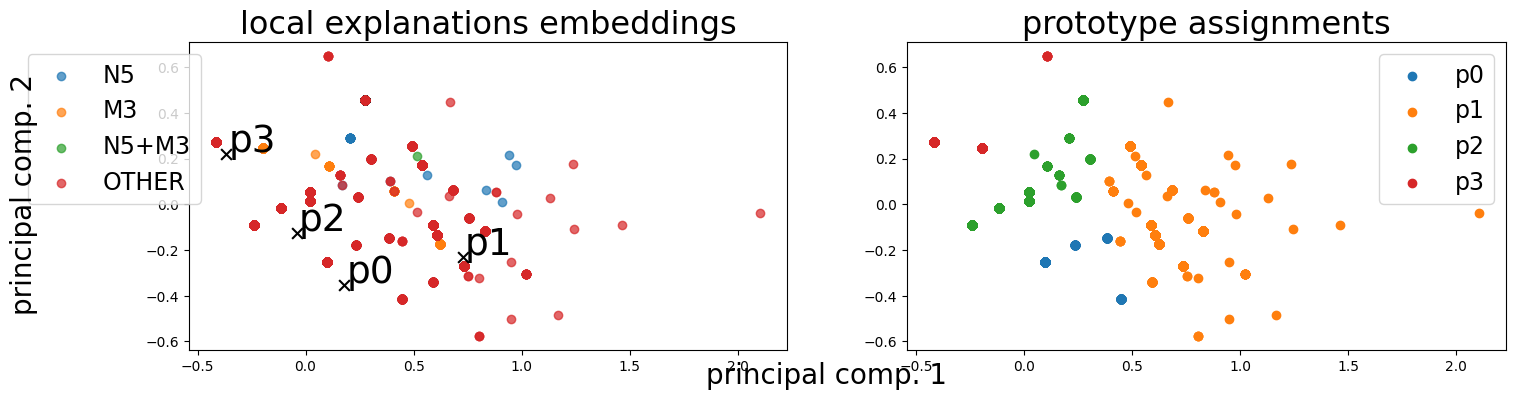

Alpha norms:
tensor([[0.9898, 0.2351, 0.9991, 1.0000],
        [0.8470, 0.8158, 0.7266, 1.0000]])
Concept Purity: 0.924973 +- 0.050732
Concept distribution:  (array([0, 1, 2, 3]), array([1127, 1802, 7875, 1059]))
Logic formulas:
For class 0:
0.749271137026239 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7494533527696793 (feature0000000001)
Accuracy as classifier:  0.7493
LEN fidelity:  tensor(0.7493)

 60: Loss: 0.06052, LEN: 0.060385, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05972, V. LEN 0.059
 61: Loss: 0.06089, LEN: 0.060758, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05947, V. LEN 0.059
 62: Loss: 0.06052, LEN: 0.060402, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05938, V. LEN 0.059
 63: Loss: 0.06087, LEN: 0.060766, Acc: 0.73, V. Acc: 0.75, V. Loss: 0.06157, V. LEN 0.061
 64: Loss: 0.06057, LEN: 0.

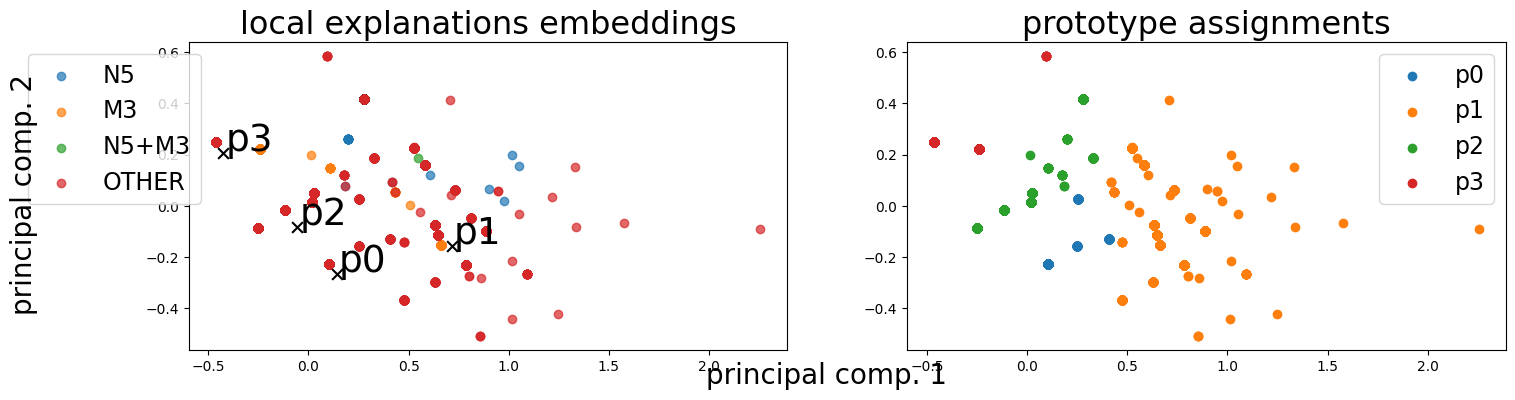

Alpha norms:
tensor([[0.7062, 0.2094, 0.9879, 1.0000],
        [0.5877, 0.7933, 0.7320, 1.0000]])
Concept Purity: 0.925588 +- 0.050818
Concept distribution:  (array([0, 1, 2, 3]), array([1105, 1882, 7817, 1059]))
Logic formulas:
For class 0:
0.7448068513119533 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000) | ((feature0000000001 & feature0000000003)
For class 1:
0.7449890670553936 (feature0000000001)
Accuracy as classifier:  0.7448
LEN fidelity:  tensor(0.7448)

 80: Loss: 0.06080, LEN: 0.060702, Acc: 0.73, V. Acc: 0.75, V. Loss: 0.05905, V. LEN 0.059
 81: Loss: 0.06081, LEN: 0.060701, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05921, V. LEN 0.058
 82: Loss: 0.06156, LEN: 0.061459, Acc: 0.73, V. Acc: 0.75, V. Loss: 0.05856, V. LEN 0.058
 83: Loss: 0.06127, LEN: 0.061158, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.059

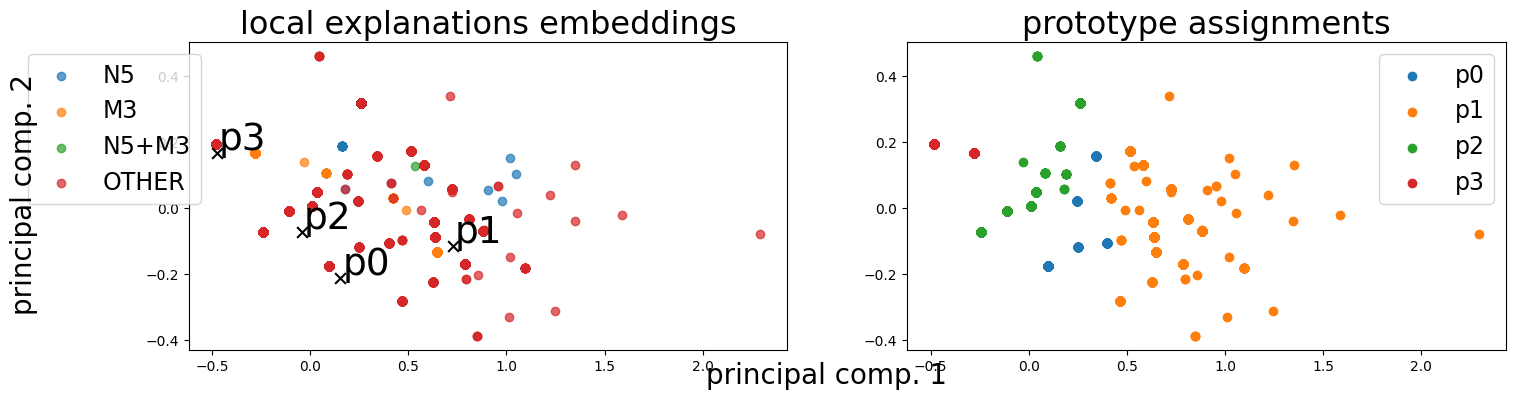

Alpha norms:
tensor([[0.5812, 0.2009, 0.9260, 1.0000],
        [0.4247, 0.7113, 0.7283, 1.0000]])
Concept Purity: 0.925270 +- 0.051078
Concept distribution:  (array([0, 1, 2, 3]), array([1164, 1882, 7763, 1054]))
Logic formulas:
For class 0:
0.7448068513119533 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000) | ((feature0000000001 & feature0000000003)
For class 1:
0.7449890670553936 (feature0000000001)
Accuracy as classifier:  0.7448
LEN fidelity:  tensor(0.7448)

100: Loss: 0.05985, LEN: 0.059755, Acc: 0.74, V. Acc: 0.75, V. Loss: 0.05859, V. LEN 0.058
101: Loss: 0.06035, LEN: 0.060250, Acc: 0.74, V. Acc: 0.76, V. Loss: 0.05571, V. LEN 0.055
102: Loss: 0.06021, LEN: 0.060109, Acc: 0.74, V. Acc: 0.74, V. Loss: 0.05904, V. LEN 0.058
103: Loss: 0.05996, LEN: 0.059858, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.058

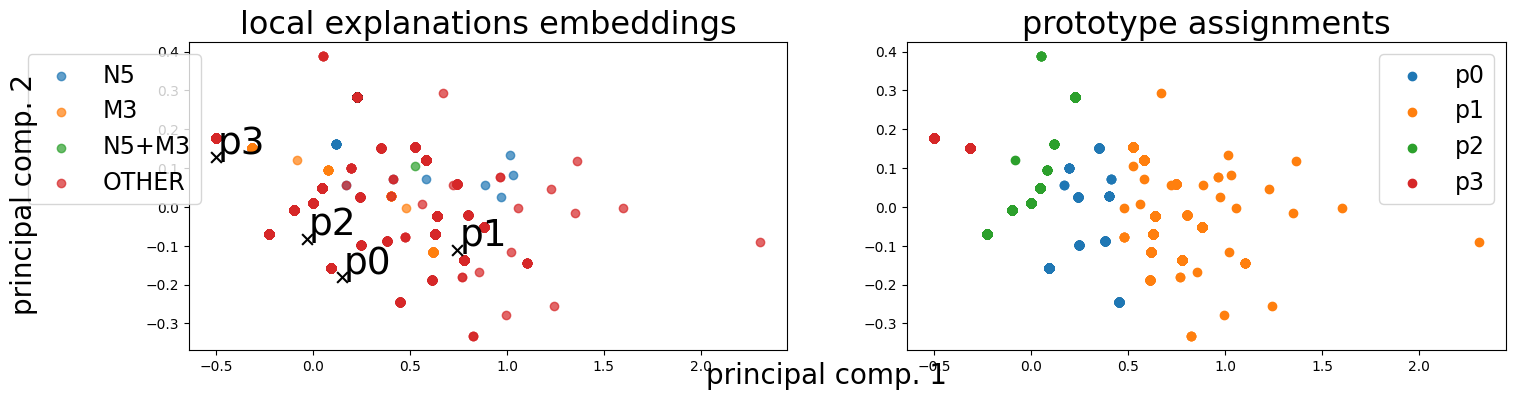

Alpha norms:
tensor([[0.5027, 0.2117, 0.9171, 1.0000],
        [0.3267, 0.5610, 0.6428, 1.0000]])
Concept Purity: 0.923466 +- 0.047533
Concept distribution:  (array([0, 1, 2, 3]), array([1270, 1787, 7752, 1054]))
Logic formulas:
For class 0:
0.7488155976676385 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7489978134110787 (feature0000000001)
Accuracy as classifier:  0.7488
LEN fidelity:  tensor(0.7488)

120: Loss: 0.05922, LEN: 0.059116, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05823, V. LEN 0.058
121: Loss: 0.05907, LEN: 0.058985, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05764, V. LEN 0.057
122: Loss: 0.05924, LEN: 0.059141, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05804, V. LEN 0.058
123: Loss: 0.05952, LEN: 0.059416, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05795, V. LEN 0.057
124: Loss: 0.05934, LEN: 0

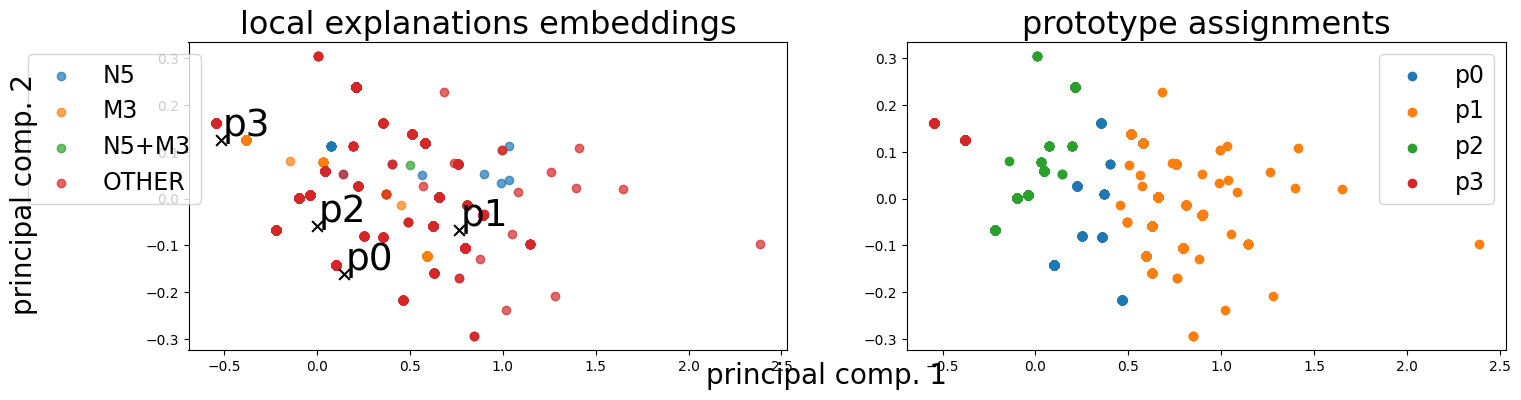

Alpha norms:
tensor([[0.5521, 0.2217, 0.8617, 1.0000],
        [0.2780, 0.4355, 0.5935, 1.0000]])
Concept Purity: 0.923641 +- 0.047779
Concept distribution:  (array([0, 1, 2, 3]), array([1259, 1787, 7763, 1054]))
Logic formulas:
For class 0:
0.7488155976676385 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7489978134110787 (feature0000000001)
Accuracy as classifier:  0.7488
LEN fidelity:  tensor(0.7488)

140: Loss: 0.05858, LEN: 0.058477, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05803, V. LEN 0.058
141: Loss: 0.05892, LEN: 0.058829, Acc: 0.75, V. Acc: 0.76, V. Loss: 0.05459, V. LEN 0.054
142: Loss: 0.05886, LEN: 0.058762, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05788, V. LEN 0.058
143: Loss: 0.05887, LEN: 0.058762, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05742, V. LEN 0.057
144: Loss: 0.05848, LEN: 0

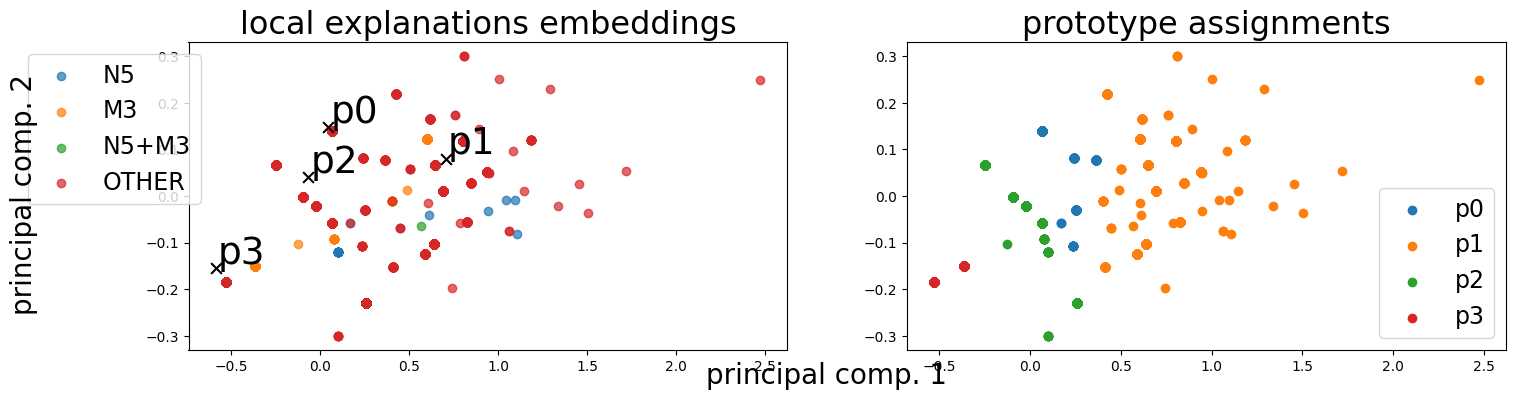

Alpha norms:
tensor([[0.5630, 0.2340, 0.8320, 1.0000],
        [0.2159, 0.3239, 0.5046, 1.0000]])
Concept Purity: 0.925577 +- 0.050814
Concept distribution:  (array([0, 1, 2, 3]), array([1116, 1941, 7752, 1054]))
Logic formulas:
For class 0:
0.7500911078717201 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000) | ((feature0000000001 & feature0000000003)
For class 1:
0.7502733236151603 (feature0000000001)
Accuracy as classifier:  0.7501
LEN fidelity:  tensor(0.7501)

160: Loss: 0.05864, LEN: 0.058539, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05724, V. LEN 0.057
161: Loss: 0.05813, LEN: 0.058050, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05735, V. LEN 0.057
162: Loss: 0.05812, LEN: 0.058017, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05711, V. LEN 0.057
163: Loss: 0.05805, LEN: 0.057967, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.058

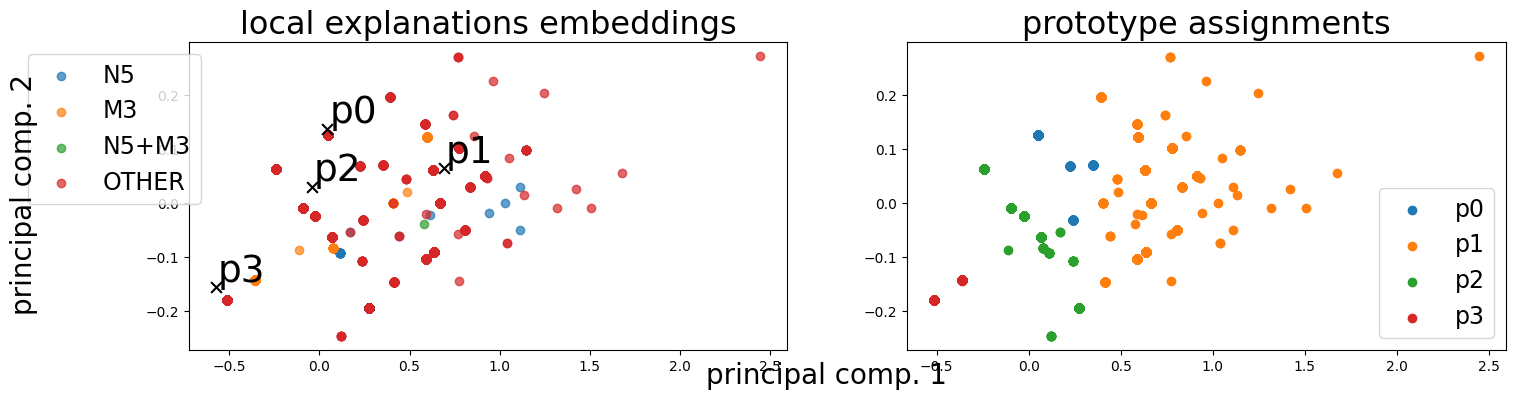

Alpha norms:
tensor([[0.5629, 0.2745, 0.8433, 1.0000],
        [0.1755, 0.3053, 0.4851, 1.0000]])
Concept Purity: 0.925799 +- 0.051139
Concept distribution:  (array([0, 1, 2, 3]), array([1105, 1941, 7763, 1054]))
Logic formulas:
For class 0:
0.7500911078717201 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000) | ((feature0000000001 & feature0000000003)
For class 1:
0.7502733236151603 (feature0000000001)
Accuracy as classifier:  0.7501
LEN fidelity:  tensor(0.7501)

180: Loss: 0.05773, LEN: 0.057651, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05721, V. LEN 0.057
181: Loss: 0.05823, LEN: 0.058120, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05678, V. LEN 0.056
182: Loss: 0.05755, LEN: 0.057461, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05732, V. LEN 0.057
183: Loss: 0.05741, LEN: 0.057320, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.057

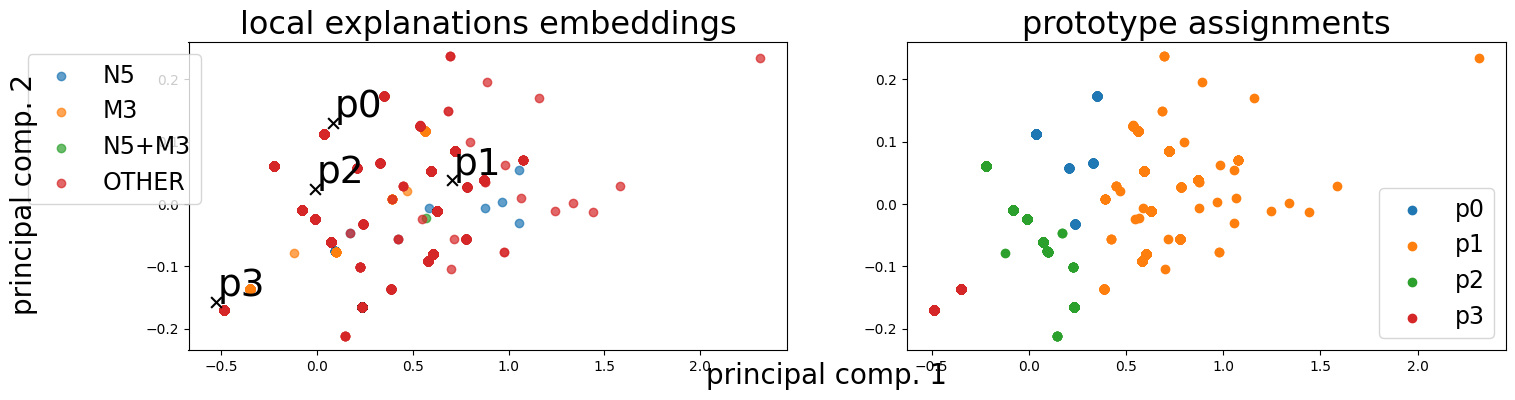

Alpha norms:
tensor([[0.5252, 0.3020, 0.8221, 1.0000],
        [0.1701, 0.2701, 0.4581, 1.0000]])
Concept Purity: 0.925074 +- 0.051059
Concept distribution:  (array([0, 1, 2, 3]), array([1185, 1861, 7763, 1054]))
Logic formulas:
For class 0:
0.7545553935860059 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7547376093294461 (feature0000000001)
Accuracy as classifier:  0.7546
LEN fidelity:  tensor(0.7546)

200: Loss: 0.05736, LEN: 0.057277, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05672, V. LEN 0.056
201: Loss: 0.05733, LEN: 0.057230, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05533, V. LEN 0.055
202: Loss: 0.05778, LEN: 0.057669, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05645, V. LEN 0.056
203: Loss: 0.05667, LEN: 0.056579, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05668, V. LEN 0.056
204: Loss: 0.05696, LEN: 0

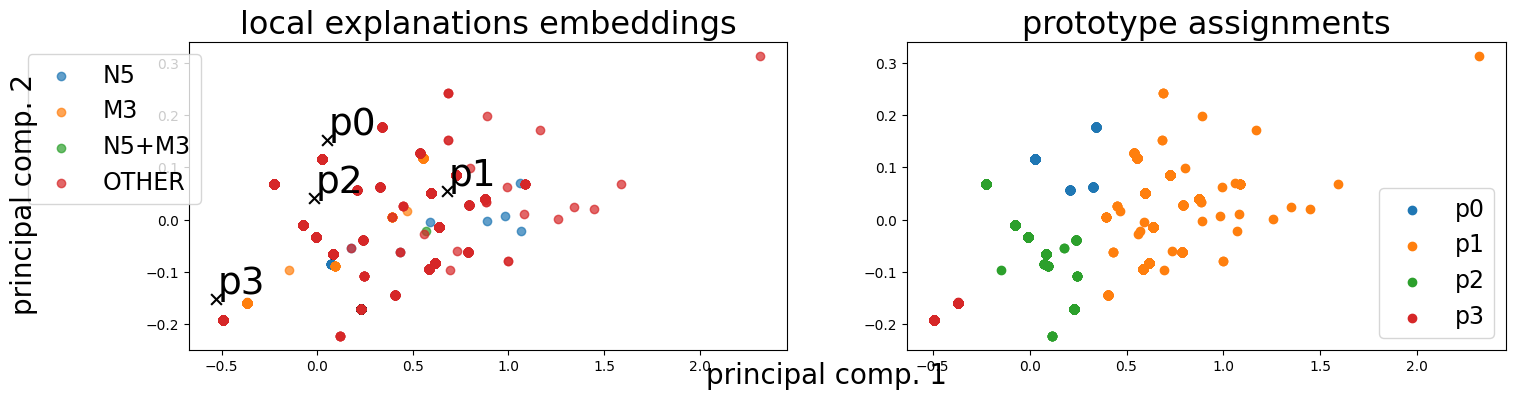

Alpha norms:
tensor([[0.5228, 0.3593, 0.8953, 1.0000],
        [0.1710, 0.2701, 0.4553, 1.0000]])
Concept Purity: 0.925233 +- 0.051025
Concept distribution:  (array([0, 1, 2, 3]), array([1127, 1861, 7821, 1054]))
Logic formulas:
For class 0:
0.7545553935860059 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7547376093294461 (feature0000000001)
Accuracy as classifier:  0.7546
LEN fidelity:  tensor(0.7546)

220: Loss: 0.05659, LEN: 0.056504, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05698, V. LEN 0.057
221: Loss: 0.05722, LEN: 0.057149, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05649, V. LEN 0.056
222: Loss: 0.05725, LEN: 0.057159, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05705, V. LEN 0.057
223: Loss: 0.05701, LEN: 0.056923, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05660, V. LEN 0.056
224: Loss: 0.05721, LEN: 0

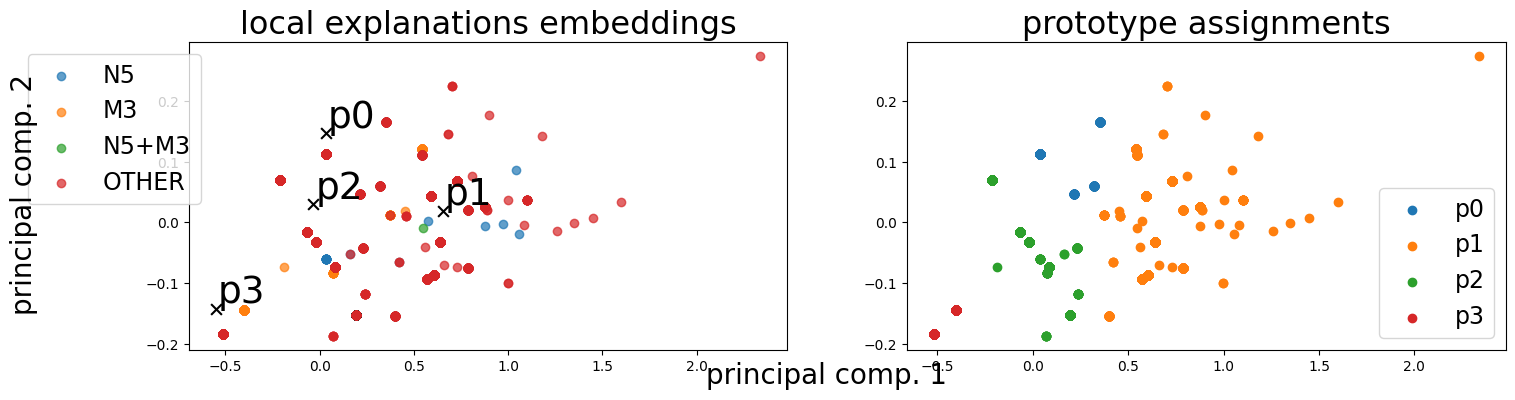

Alpha norms:
tensor([[0.5565, 0.4067, 0.8763, 1.0000],
        [0.1546, 0.2496, 0.4055, 1.0000]])
Concept Purity: 0.925233 +- 0.051025
Concept distribution:  (array([0, 1, 2, 3]), array([1127, 1861, 7821, 1054]))
Logic formulas:
For class 0:
0.7545553935860059 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7547376093294461 (feature0000000001)
Accuracy as classifier:  0.7546
LEN fidelity:  tensor(0.7546)


240: Loss: 0.05704, LEN: 0.056962, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05650, V. LEN 0.056
241: Loss: 0.05620, LEN: 0.056115, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05648, V. LEN 0.056
242: Loss: 0.05692, LEN: 0.056847, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05643, V. LEN 0.056
243: Loss: 0.05672, LEN: 0.056643, Acc: 0.75, V. Acc: 0.76, V. Loss: 0.05437, V. LEN 0.054
244: Loss: 0.05717, LEN: 

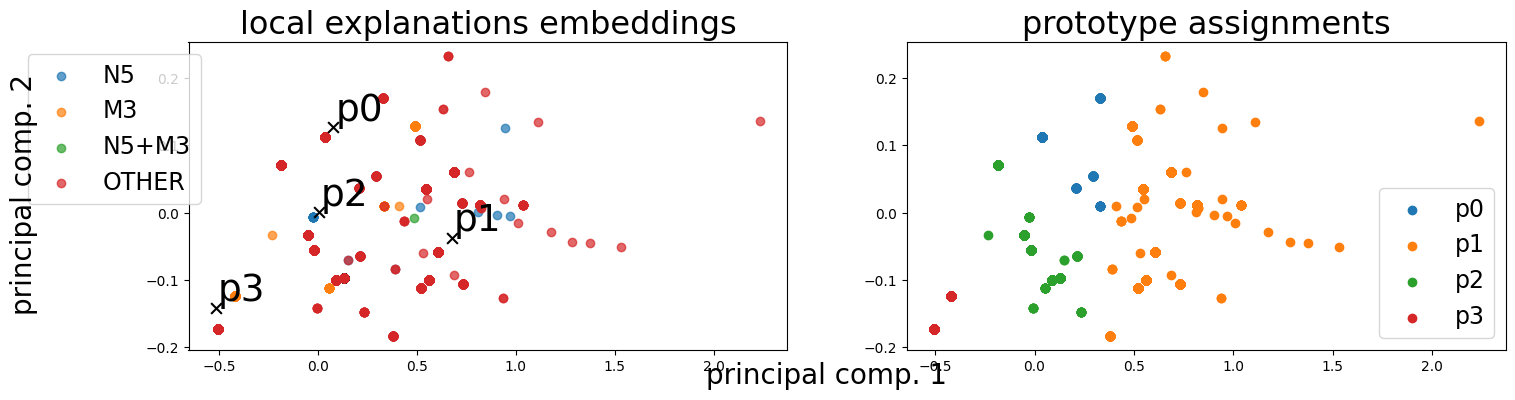

Alpha norms:
tensor([[0.6780, 0.4775, 0.7744, 1.0000],
        [0.1487, 0.2674, 0.3979, 1.0000]])
Concept Purity: 0.924192 +- 0.047795
Concept distribution:  (array([0, 1, 2, 3]), array([1139, 1849, 7821, 1054]))
Logic formulas:
For class 0:
0.7538265306122449 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000000 & feature0000000002) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7540087463556852 (feature0000000001)
Accuracy as classifier:  0.7538
LEN fidelity:  tensor(0.7538)


260: Loss: 0.05676, LEN: 0.056682, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05719, V. LEN 0.057
261: Loss: 0.05679, LEN: 0.056713, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05669, V. LEN 0.056
262: Loss: 0.05698, LEN: 0.056906, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05624, V. LEN 0.056
263: Loss: 0.05652, LEN: 0.056444, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05668, V. LEN 0.056
264: Loss: 0.05667, LEN: 

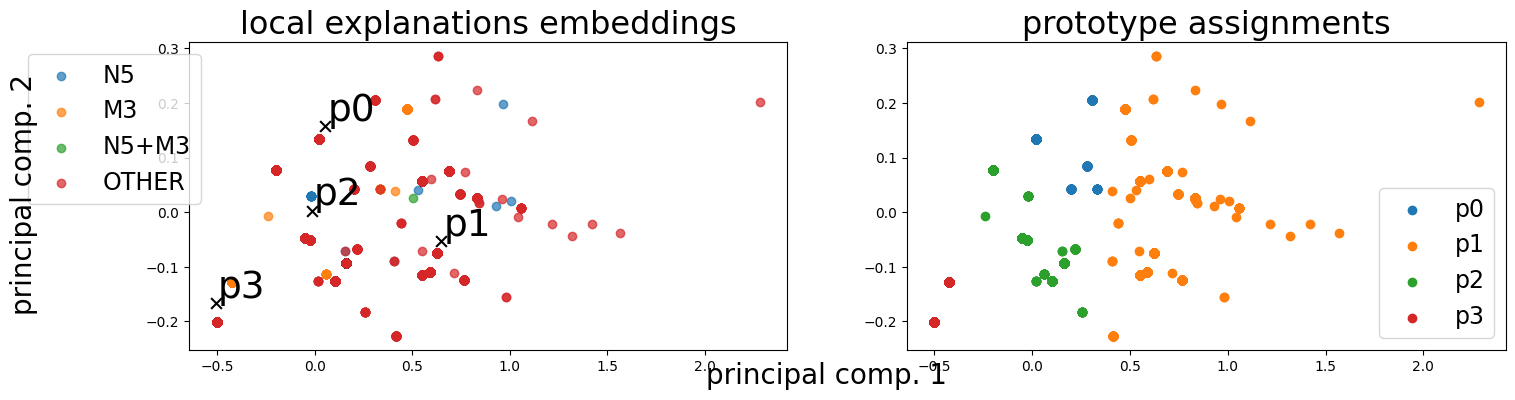

Alpha norms:
tensor([[0.7271, 0.5502, 0.7141, 1.0000],
        [0.1633, 0.3000, 0.4266, 1.0000]])
Concept Purity: 0.924192 +- 0.047795
Concept distribution:  (array([0, 1, 2, 3]), array([1139, 1849, 7821, 1054]))
Logic formulas:
For class 0:
0.7538265306122449 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000002 & feature0000000000) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7540087463556852 (feature0000000001)
Accuracy as classifier:  0.7538
LEN fidelity:  tensor(0.7538)


280: Loss: 0.05665, LEN: 0.056571, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05668, V. LEN 0.056
281: Loss: 0.05709, LEN: 0.056993, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05658, V. LEN 0.056
282: Loss: 0.05778, LEN: 0.057662, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05659, V. LEN 0.056
283: Loss: 0.05710, LEN: 0.057018, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05642, V. LEN 0.056
284: Loss: 0.05687, LEN: 

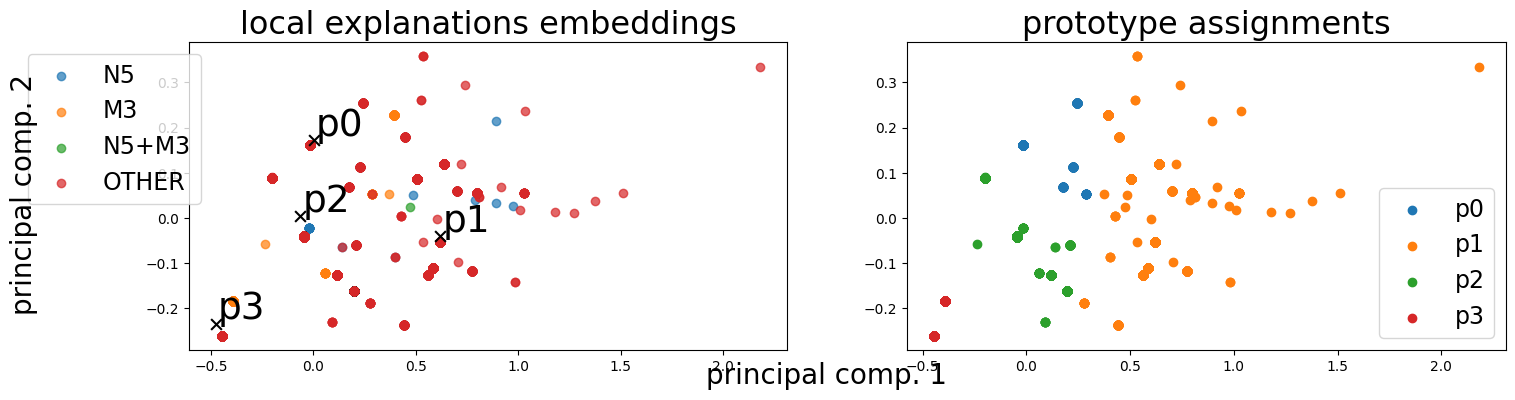

Alpha norms:
tensor([[0.7930, 0.5935, 0.6903, 1.0000],
        [0.1926, 0.3484, 0.4795, 1.0000]])
Concept Purity: 0.924246 +- 0.047818
Concept distribution:  (array([0, 1, 2, 3]), array([1139, 1858, 7812, 1054]))
Logic formulas:
For class 0:
0.7547376093294461 (feature0000000002) | (feature0000000000) | (feature0000000003) | (feature0000000002 & feature0000000000) | (feature0000000002 & feature0000000003) | (feature0000000000 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000000)
For class 1:
0.7533709912536443 (feature0000000001) | ((feature0000000000 & feature0000000002)
Accuracy as classifier:  0.7533
LEN fidelity:  tensor(0.7533)

300: Loss: 0.05967, LEN: 0.059549, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05719, V. LEN 0.057
301: Loss: 0.05879, LEN: 0.058694, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05748, V. LEN 0.057
302: Loss: 0.05883, LEN: 0.058737, Acc: 0.75, V. Acc: 0.75, V. Loss: 0.05704, V. LEN 0.057
303: Loss: 0.05870, LEN: 0.05861

In [6]:
expl.iterate(train_group_loader, test_group_loader, plot=True)

(array([0., 1., 3.], dtype=float32), array([ 150,   58, 2691]))
[0.7246035  0.24115866]


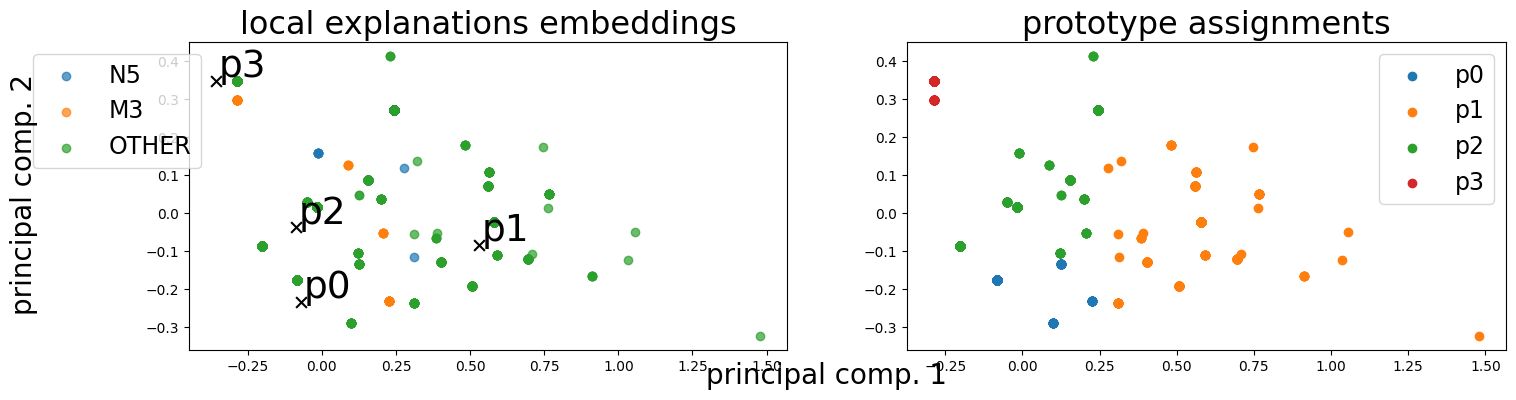

Alpha norms:
tensor([[0.8093, 0.5750, 0.6114, 1.0000],
        [0.2037, 0.3772, 0.5214, 1.0000]])
Concept Purity: 0.934731 +- 0.041491
Concept distribution:  (array([0, 1, 2, 3]), array([ 308,  421, 1908,  262]))
Logic formulas:
For class 0:
0.7416232315711094 (feature0000000000) | (feature0000000002) | (feature0000000003) | ((feature0000000001 & feature0000000002)
For class 1:
0.742367833209233 (feature0000000001)
Accuracy as classifier:  0.7416
LEN fidelity:  tensor(0.7416)


In [7]:
expl.inspect(test_group_loader)

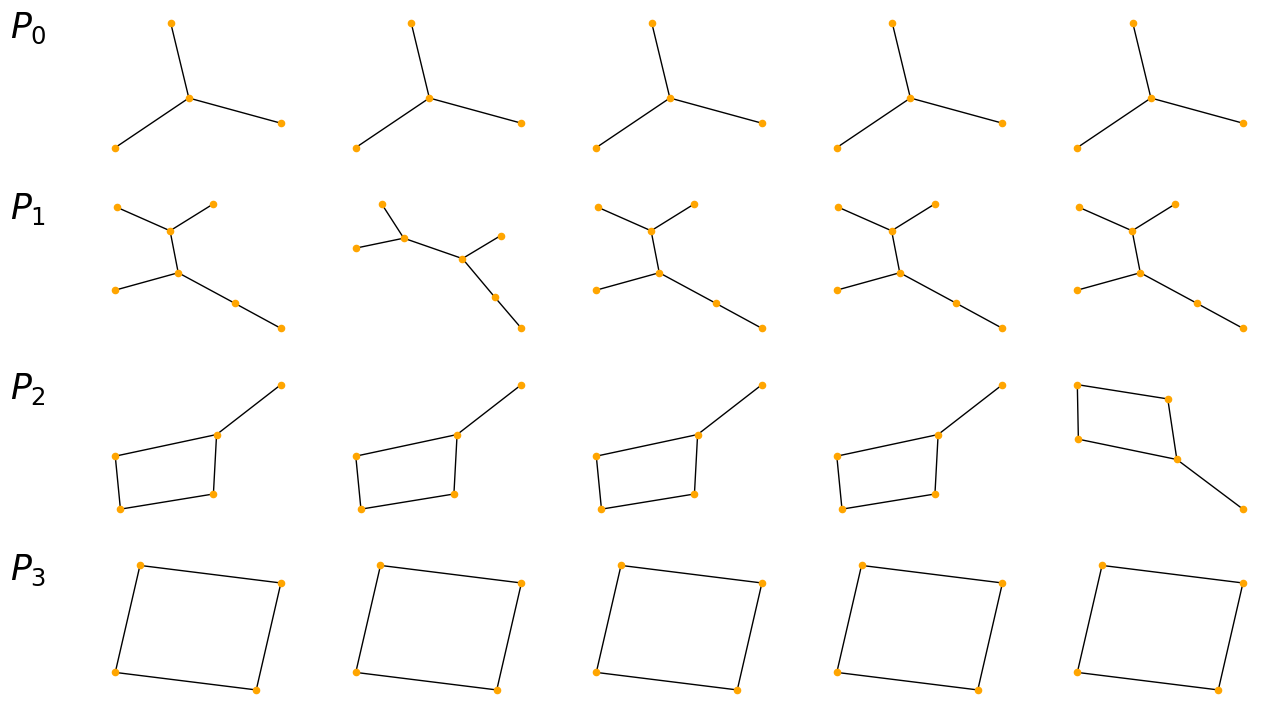

In [8]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()

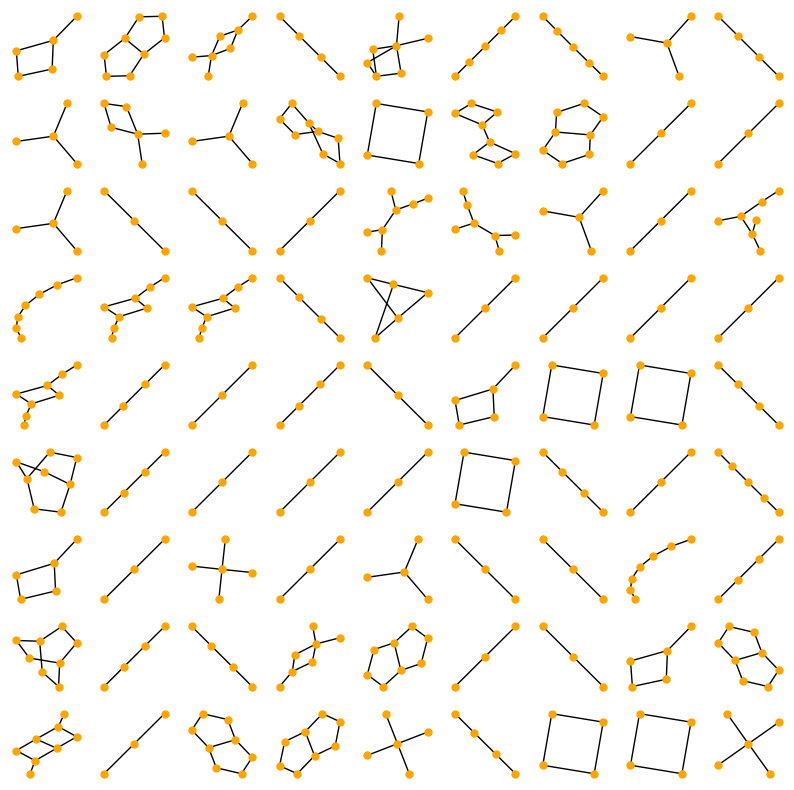

In [9]:
fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	G = nx.Graph(adjs_train[i], undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=25)

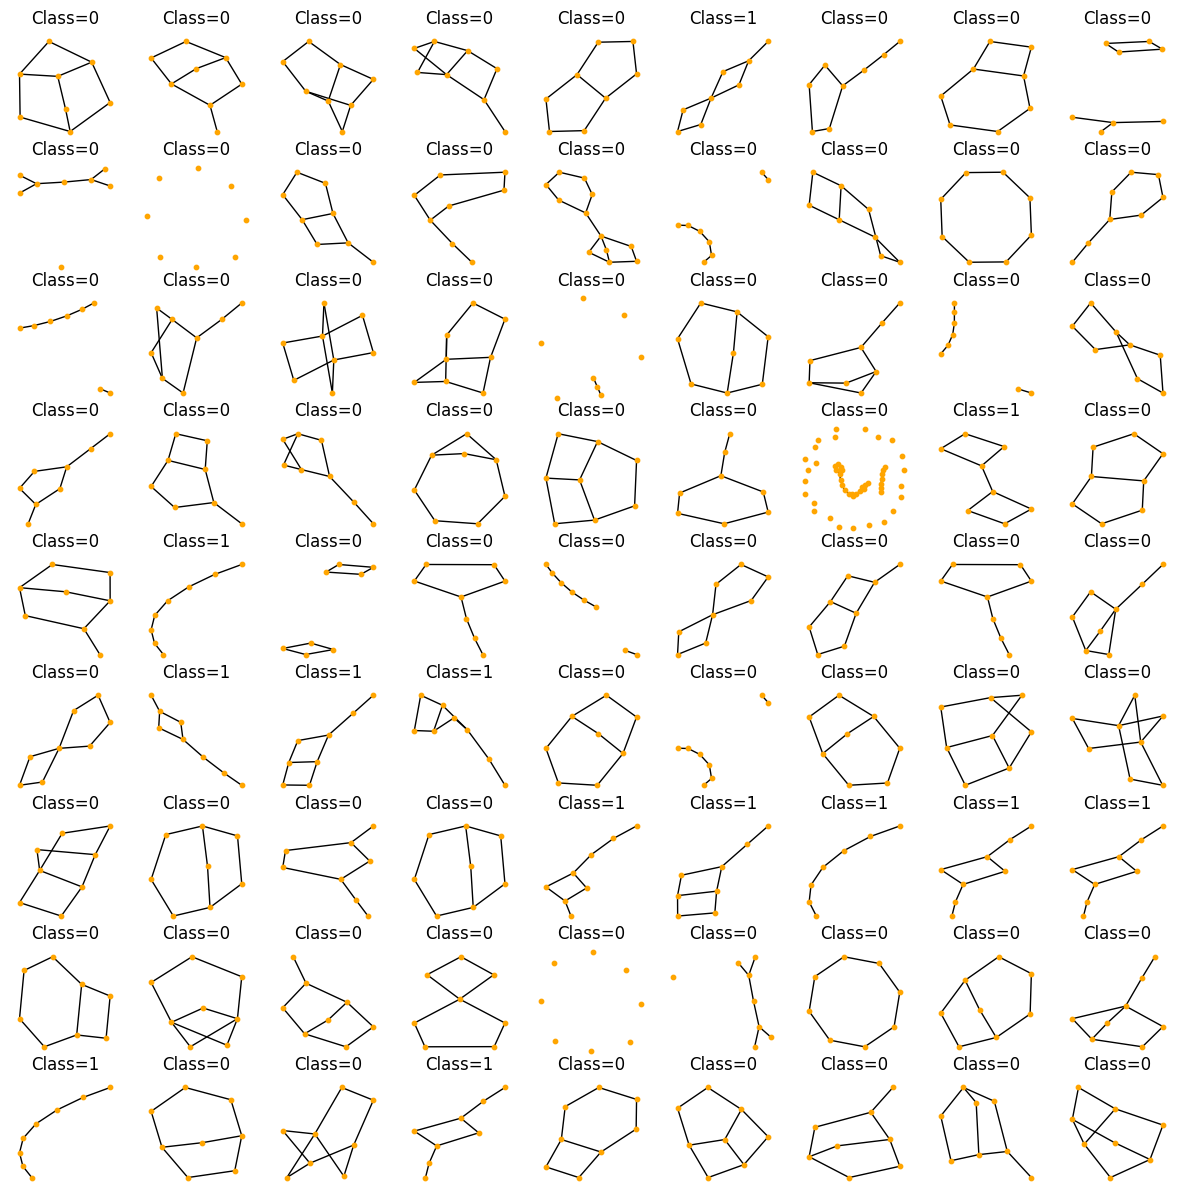

In [10]:
import numpy as np
data = np.load("local_features/PGExplainer/Distributive_weak/x_train.npz")
y = np.load("local_features/PGExplainer/Distributive_weak/y_train.npy")
adjs = list(data.values())

fig, axs = plt.subplots(9, 9, figsize=(15, 15))
axs = axs.flatten()

for i in range(81):
	adj = adjs[i].squeeze()
	adj[adj > 0] = 1
	G = nx.Graph(adj, undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=10)
	axs[i].set_title(f'Class={y[i]}')